# Include Toolbox

In [1]:
include("ToolBox/ToolBox.jl")
using .ToolBox

### Define test data

In [2]:
path_img1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_ann_1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod_1 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"

"/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"

In [3]:
reflector_heigt = [42.753,43.282,44.475]
reflector_index_img1 = [[1126,6087],[1123, 6100],[1127, 6111]]
salih = hcat(vcat(reflector_index_img1'...),reflector_heigt)
sali = vcat(reflector_index_img1'...)

3×2 Array{Int64,2}:
 1126  6087
 1123  6100
 1127  6111

In [4]:
view =[100:2000, 100:2000];

## Load library

In [5]:
data = Load.s1slc_data(path_img1,view)
ann = Load.s1slc_ann(path_ann_1);
pod = Load.pod(path_pod_1,ann["t_0"]);

 ## SlcUtil library

In [6]:
test = SlcRaw(view,ann,data)

SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[100:2000,100:2000]

In [7]:
size(test)

(1901, 1901)

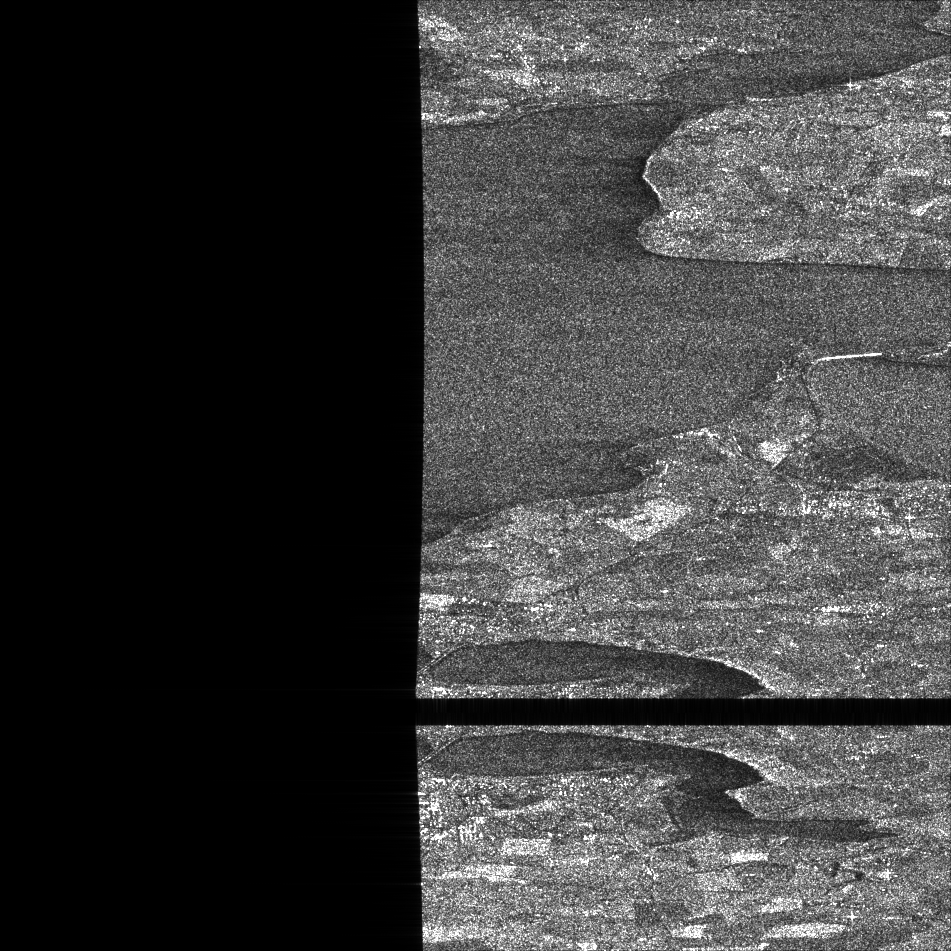

In [8]:
SlcUtil.show_img(test)

## Geometry

In [9]:
using .Geometry

In [10]:
ll = salih2ll(sali,reflector_heigt, pod..., ann)

3×2 Array{Float64,2}:
 56.5619  8.30744
 56.5623  8.30682
 56.5619  8.30604

In [11]:
llh2sali(ll,reflector_heigt,pod...,ann)

3×2 Array{Float64,2}:
 1126.0  6087.0
 1123.0  6100.0
 1127.0  6111.0

## Misc

In [12]:
Misc.print2maps_co(ll[:,1],ll[:,2])

56.561877486841496,8.307440440170094,Corner,#FF0000
56.562312376538316,8.306822143671212,Corner,#FF0000
56.56187918729438,8.30604220751215,Corner,#FF0000
